In [1]:
import pandas as pd

data = pd.read_csv('insurance.csv')

In [2]:
data.head(30)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [3]:
data.shape

(1338, 7)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [5]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

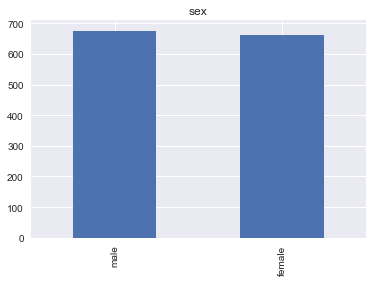

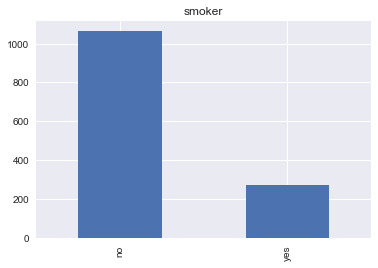

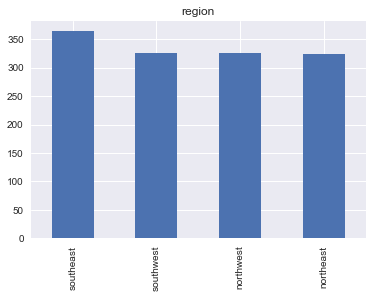

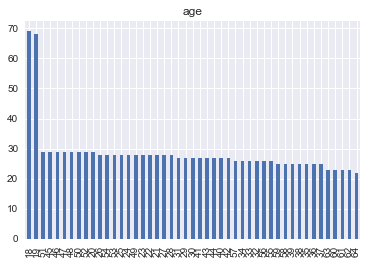

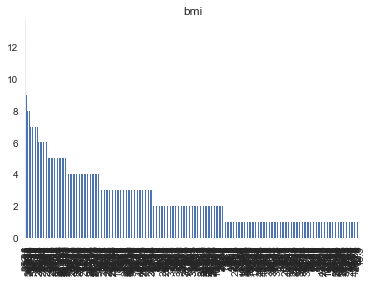

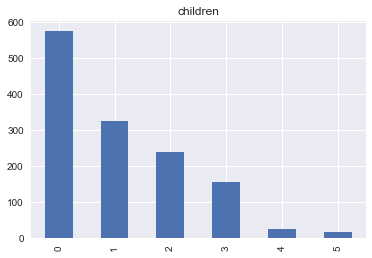

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

variables = ['sex','smoker','region','age','bmi','children']
for v in variables:
    data = data.sort_values(by=[v])
    data[v].value_counts().plot(kind = 'bar')
    plt.title(v)
    plt.show()

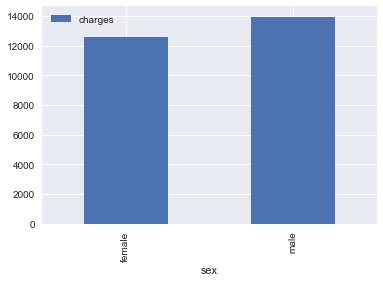

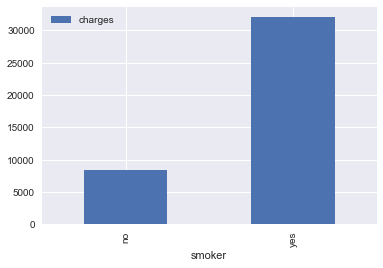

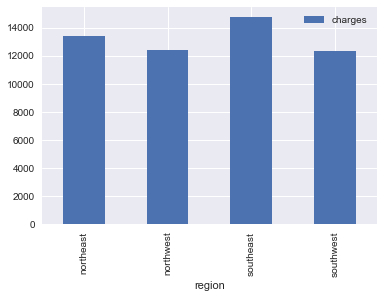

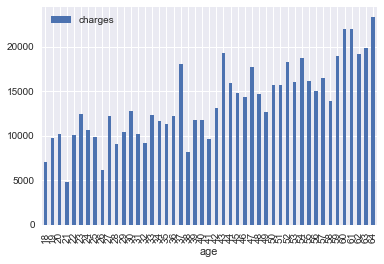

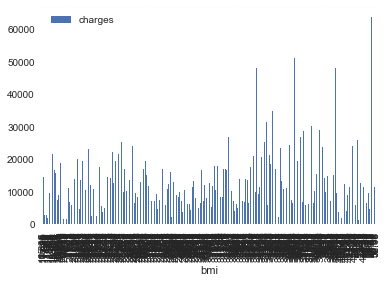

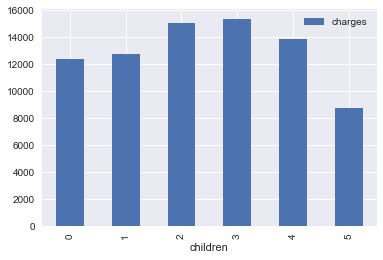

In [7]:
for v in variables:
    group_data = data.groupby(pd.Grouper(key=v)).mean()
    group_data = group_data.sort_index()
    group_data.plot(y = ['charges'],kind = 'bar')
    plt.show()

In [8]:
def map_smoking(column):
    mapped=[]
    for row in column:
        if row=="yes":
            mapped.append(1)
        else:
            mapped.append(0)
    return mapped

data["smoker"]=map_smoking(data["smoker"])

In [9]:
data.head()

,age,sex,bmi,children,smoker,region,charges
172,18,male,15.96,0,0,northeast,1694.7964
850,37,female,30.78,0,1,northeast,37270.1512
550,63,male,30.80,0,0,southwest,13390.5590
112,37,male,30.80,0,0,southwest,4646.7590
322,34,male,30.80,0,1,southwest,35491.6400


In [10]:
from IPython.display import Image

Image(url= "https://imageresizer.static9.net.au/XLEcZDFORqiLDhkkkfZuKLy70VU=/1024x0/http%3A%2F%2Fprod.static9.net.au%2F_%2Fmedia%2FNetwork%2FImages%2F2018%2F04%2F04%2F13%2F08%2F180404_coach_bmi.jpg")

In [11]:
def bmi_category(bmi):
    if bmi < 18.5:
        return 0
    elif bmi >= 18.5 and bmi < 25:
        return 1
    elif bmi >= 25 and bmi < 30:
        return 2
    elif bmi >= 30 and bmi < 35:
        return 3
    elif bmi >= 35:
        return 4    
    
def age_category(age):
    return age//10

data['cbmi'] = data['bmi'].apply(lambda x: "none")
data['cage'] = data['age'].apply(lambda x: "none")

for idx, row in data.iterrows():
    data.at[idx, 'cage'] = age_category(row['age'])
    data.at[idx, 'cbmi'] = bmi_category(row['bmi'])

In [12]:
data.head()

,age,sex,bmi,children,smoker,region,charges,cbmi,cage
172,18,male,15.96,0,0,northeast,1694.7964,0,1
850,37,female,30.78,0,1,northeast,37270.1512,3,3
550,63,male,30.80,0,0,southwest,13390.5590,3,6
112,37,male,30.80,0,0,southwest,4646.7590,3,3
322,34,male,30.80,0,1,southwest,35491.6400,3,3


In [13]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
cbmi        0
cage        0
dtype: int64

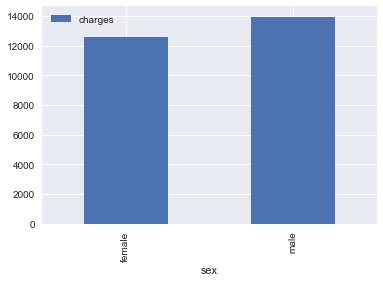

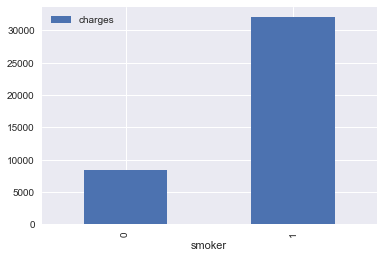

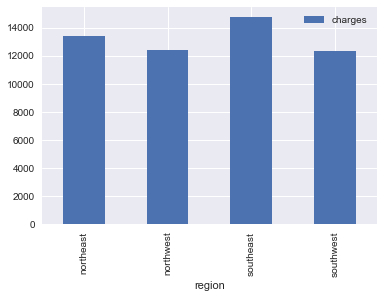

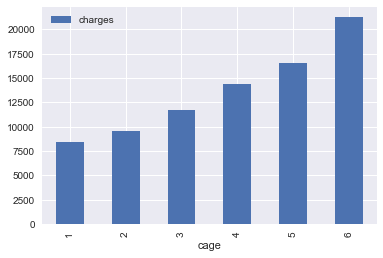

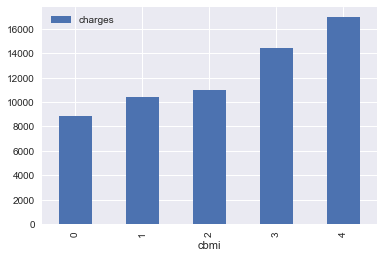

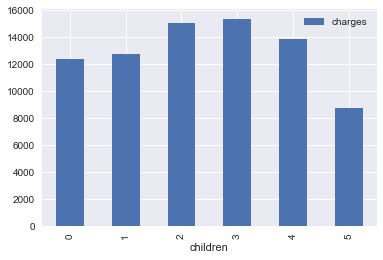

In [14]:
variables = ['sex','smoker','region','cage','cbmi','children']

for v in variables:
    group_data = data.groupby(pd.Grouper(key=v)).mean()
    group_data = group_data.sort_index()
    group_data.plot(y = ['charges'],kind = 'bar')
    plt.show()

In [15]:
features_drop = ['age', 'sex', 'bmi', 'children', 'region']
data = data.drop(features_drop, axis=1)

In [16]:
data.head()

,smoker,charges,cbmi,cage
172,0,1694.7964,0,1
850,1,37270.1512,3,3
550,0,13390.5590,3,6
112,0,4646.7590,3,3
322,1,35491.6400,3,3


In [17]:
data.isnull().sum()

smoker     0
charges    0
cbmi       0
cage       0
dtype: int64

In [18]:
train_data = data.drop('charges', axis=1)
target = data['charges']

train_data.shape, target.shape

((1338, 3), (1338,))

In [19]:
train_data.head()

,smoker,cbmi,cage
172,0,0,1
850,1,3,3
550,0,3,6
112,0,3,3
322,1,3,3


In [20]:
train_data.isnull().sum()

smoker    0
cbmi      0
cage      0
dtype: int64

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [40]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)

In [41]:
train_data[:10]


,smoker,cbmi,cage
172,0,0,1
850,1,3,3
550,0,3,6
112,0,3,3
322,1,3,3
1098,0,3,5
749,0,3,2
519,0,3,3
1049,1,3,4
673,0,3,4


In [42]:
target[:10]

172      1694.79640
850     37270.15120
550     13390.55900
112      4646.75900
322     35491.64000
1098    23045.56616
749      3062.50825
519      3857.75925
1049    39727.61400
673      6185.32080
Name: charges, dtype: float64

In [43]:
clf = KNeighborsClassifier(n_neighbors = 3)
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=2, scoring='accuracy')
print(score)

JoblibValueError: JoblibValueError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
C:\ProgramData\Anaconda3\lib\runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
C:\ProgramData\Anaconda3\lib\runpy.py in _run_code(code=<code object <module> at 0x000000316C61B780, fil...lib\site-packages\ipykernel_launcher.py", line 5>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\ProgramData\Anaconda3\lib\site-packages\__pycache__\ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\ProgramD...a3\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x000000316C61B780, fil...lib\site-packages\ipykernel_launcher.py", line 5>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\ProgramData\Anaconda3\lib\site-packages\__pycache__\ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\ProgramD...a3\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    472             return self.subapp.start()
    473         if self.poller is not None:
    474             self.poller.start()
    475         self.kernel.start()
    476         try:
--> 477             ioloop.IOLoop.instance().start()
    478         except KeyboardInterrupt:
    479             pass
    480 
    481 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\zmq\eventloop\ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    172             )
    173         return loop
    174     
    175     def start(self):
    176         try:
--> 177             super(ZMQIOLoop, self).start()
        self.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    178         except ZMQError as e:
    179             if e.errno == ETERM:
    180                 # quietly return on ETERM
    181                 pass

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\tornado\ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    883                 self._events.update(event_pairs)
    884                 while self._events:
    885                     fd, events = self._events.popitem()
    886                     try:
    887                         fd_obj, handler_func = self._handlers[fd]
--> 888                         handler_func(fd_obj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fd_obj = <zmq.sugar.socket.Socket object>
        events = 1
    889                     except (OSError, IOError) as e:
    890                         if errno_from_exception(e) == errno.EPIPE:
    891                             # Happens when the client closes the connection
    892                             pass

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    435             # dispatch events:
    436             if events & IOLoop.ERROR:
    437                 gen_log.error("got POLLERR event on ZMQStream, which doesn't make sense")
    438                 return
    439             if events & IOLoop.READ:
--> 440                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    441                 if not self.socket:
    442                     return
    443             if events & IOLoop.WRITE:
    444                 self._handle_send()

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    467                 gen_log.error("RECV Error: %s"%zmq.strerror(e.errno))
    468         else:
    469             if self._recv_callback:
    470                 callback = self._recv_callback
    471                 # self._recv_callback = None
--> 472                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    473                 
    474         # self.update_state()
    475         
    476 

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    409         close our socket."""
    410         try:
    411             # Use a NullContext to ensure that all StackContexts are run
    412             # inside our blanket exception handler rather than outside.
    413             with stack_context.NullContext():
--> 414                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    415         except:
    416             gen_log.error("Uncaught exception, closing connection.",
    417                           exc_info=True)
    418             # Close the socket on an uncaught exception from a user callback

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': "clf = KNeighborsClassifier(n_neighbors = 3)\nscor..._fold, n_jobs=2, scoring='accuracy')\nprint(score)", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 6, 19, 4, 39, 14, 765030, tzinfo=tzutc()), 'msg_id': '347360EA868F47288EAD14BF11A45AC5', 'msg_type': 'execute_request', 'session': 'B88D457E0EFB4ECBA6772E3E738BE495', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '347360EA868F47288EAD14BF11A45AC5', 'msg_type': 'execute_request', 'parent_header': {}})
    230             self.log.warn("Unknown message type: %r", msg_type)
    231         else:
    232             self.log.debug("%s: %s", msg_type, msg)
    233             self.pre_handler_hook()
    234             try:
--> 235                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'B88D457E0EFB4ECBA6772E3E738BE495']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': "clf = KNeighborsClassifier(n_neighbors = 3)\nscor..._fold, n_jobs=2, scoring='accuracy')\nprint(score)", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 6, 19, 4, 39, 14, 765030, tzinfo=tzutc()), 'msg_id': '347360EA868F47288EAD14BF11A45AC5', 'msg_type': 'execute_request', 'session': 'B88D457E0EFB4ECBA6772E3E738BE495', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '347360EA868F47288EAD14BF11A45AC5', 'msg_type': 'execute_request', 'parent_header': {}}
    236             except Exception:
    237                 self.log.error("Exception in message handler:", exc_info=True)
    238             finally:
    239                 self.post_handler_hook()

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'B88D457E0EFB4ECBA6772E3E738BE495'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': "clf = KNeighborsClassifier(n_neighbors = 3)\nscor..._fold, n_jobs=2, scoring='accuracy')\nprint(score)", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 6, 19, 4, 39, 14, 765030, tzinfo=tzutc()), 'msg_id': '347360EA868F47288EAD14BF11A45AC5', 'msg_type': 'execute_request', 'session': 'B88D457E0EFB4ECBA6772E3E738BE495', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '347360EA868F47288EAD14BF11A45AC5', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code="clf = KNeighborsClassifier(n_neighbors = 3)\nscor..._fold, n_jobs=2, scoring='accuracy')\nprint(score)", silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    191 
    192         self._forward_input(allow_stdin)
    193 
    194         reply_content = {}
    195         try:
--> 196             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = "clf = KNeighborsClassifier(n_neighbors = 3)\nscor..._fold, n_jobs=2, scoring='accuracy')\nprint(score)"
        store_history = True
        silent = False
    197         finally:
    198             self._restore_input()
    199 
    200         if res.error_before_exec is not None:

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=("clf = KNeighborsClassifier(n_neighbors = 3)\nscor..._fold, n_jobs=2, scoring='accuracy')\nprint(score)",), **kwargs={'silent': False, 'store_history': True})
    528             )
    529         self.payload_manager.write_payload(payload)
    530 
    531     def run_cell(self, *args, **kwargs):
    532         self._last_traceback = None
--> 533         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ("clf = KNeighborsClassifier(n_neighbors = 3)\nscor..._fold, n_jobs=2, scoring='accuracy')\nprint(score)",)
        kwargs = {'silent': False, 'store_history': True}
    534 
    535     def _showtraceback(self, etype, evalue, stb):
    536         # try to preserve ordering of tracebacks and print statements
    537         sys.stdout.flush()

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell="clf = KNeighborsClassifier(n_neighbors = 3)\nscor..._fold, n_jobs=2, scoring='accuracy')\nprint(score)", store_history=True, silent=False, shell_futures=True)
   2693                 self.displayhook.exec_result = result
   2694 
   2695                 # Execute the user code
   2696                 interactivity = "none" if silent else self.ast_node_interactivity
   2697                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2698                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2699                 
   2700                 self.last_execution_succeeded = not has_raised
   2701 
   2702                 # Reset this so later displayed values do not modify the

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Assign object>, <_ast.Assign object>, <_ast.Expr object>], cell_name='<ipython-input-43-ee32bfc7cc6c>', interactivity='last', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 310924dd30, execution..._before_exec=None error_in_exec=None result=None>)
   2797 
   2798         try:
   2799             for i, node in enumerate(to_run_exec):
   2800                 mod = ast.Module([node])
   2801                 code = compiler(mod, cell_name, "exec")
-> 2802                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x000000310661DB70, file "<ipython-input-43-ee32bfc7cc6c>", line 2>
        result = <ExecutionResult object at 310924dd30, execution..._before_exec=None error_in_exec=None result=None>
   2803                     return True
   2804 
   2805             for i, node in enumerate(to_run_interactive):
   2806                 mod = ast.Interactive([node])

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x000000310661DB70, file "<ipython-input-43-ee32bfc7cc6c>", line 2>, result=<ExecutionResult object at 310924dd30, execution..._before_exec=None error_in_exec=None result=None>)
   2857         outflag = True  # happens in more places, so it's easier as default
   2858         try:
   2859             try:
   2860                 self.hooks.pre_run_code_hook()
   2861                 #rprint('Running code', repr(code_obj)) # dbg
-> 2862                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x000000310661DB70, file "<ipython-input-43-ee32bfc7cc6c>", line 2>
        self.user_global_ns = {'DecisionTreeClassifier': <class 'sklearn.tree.tree.DecisionTreeClassifier'>, 'GaussianNB': <class 'sklearn.naive_bayes.GaussianNB'>, 'Image': <class 'IPython.core.display.Image'>, 'In': ['', "import pandas as pd\n\ndata = pd.read_csv('insurance.csv')", 'data.head(30)', 'data.shape', 'data.info()', 'data.isnull().sum()', "import matplotlib.pyplot as plt\nget_ipython().ma...lot(kind = 'bar')\n    plt.title(v)\n    plt.show()", "for v in variables:\n    group_data = data.groupb...plot(y = ['charges'],kind = 'bar')\n    plt.show()", 'def map_smoking(column):\n    mapped=[]\n    for r...apped\n\ndata["smoker"]=map_smoking(data["smoker"])', 'data.head()', 'from IPython.display import Image\n\nImage(url= "h...2018%2F04%2F04%2F13%2F08%2F180404_coach_bmi.jpg")', "def bmi_category(bmi):\n    if bmi < 18.5:\n      ...  data.at[idx, 'cbmi'] = bmi_category(row['bmi'])", 'data.head()', 'data.isnull().sum()', "variables = ['sex','smoker','region','cage','cbm...plot(y = ['charges'],kind = 'bar')\n    plt.show()", "features_drop = ['age', 'sex', 'bmi', 'children', 'region']\ndata = data.drop(features_drop, axis=1)", 'data.head()', 'data.isnull().sum()', "train_data = data.drop('charges', axis=1)\ntarget = data['charges']\n\ntrain_data.shape, target.shape", 'train_data.head()', ...], 'KFold': <class 'sklearn.model_selection._split.KFold'>, 'KNeighborsClassifier': <class 'sklearn.neighbors.classification.KNeighborsClassifier'>, 'Out': {2:     age     sex     bmi  children smoker     reg...  36.300         2    yes  southwest  38711.00000, 3: (1338, 7), 5: age         0
sex         0
bmi         0
childr...r      0
region      0
charges     0
dtype: int64, 9:      age     sex    bmi  children  smoker     re...e  30.80         0       1  southwest  35491.6400, 10: <IPython.core.display.Image object>, 12:      age     sex    bmi  children  smoker     re...       0       1  southwest  35491.6400    3    3, 13: age         0
sex         0
bmi         0
childr...es     0
cbmi        0
cage        0
dtype: int64, 16:      smoker     charges cbmi cage
172       0   ....7590    3    3
322       1  35491.6400    3    3, 17: smoker     0
charges    0
cbmi       0
cage       0
dtype: int64, 18: ((1338, 3), (1338,)), ...}, 'RandomForestClassifier': <class 'sklearn.ensemble.forest.RandomForestClassifier'>, 'SVC': <class 'sklearn.svm.classes.SVC'>, '_': 172      1694.79640
850     37270.15120
550     ...673      6185.32080
Name: charges, dtype: float64, ...}
        self.user_ns = {'DecisionTreeClassifier': <class 'sklearn.tree.tree.DecisionTreeClassifier'>, 'GaussianNB': <class 'sklearn.naive_bayes.GaussianNB'>, 'Image': <class 'IPython.core.display.Image'>, 'In': ['', "import pandas as pd\n\ndata = pd.read_csv('insurance.csv')", 'data.head(30)', 'data.shape', 'data.info()', 'data.isnull().sum()', "import matplotlib.pyplot as plt\nget_ipython().ma...lot(kind = 'bar')\n    plt.title(v)\n    plt.show()", "for v in variables:\n    group_data = data.groupb...plot(y = ['charges'],kind = 'bar')\n    plt.show()", 'def map_smoking(column):\n    mapped=[]\n    for r...apped\n\ndata["smoker"]=map_smoking(data["smoker"])', 'data.head()', 'from IPython.display import Image\n\nImage(url= "h...2018%2F04%2F04%2F13%2F08%2F180404_coach_bmi.jpg")', "def bmi_category(bmi):\n    if bmi < 18.5:\n      ...  data.at[idx, 'cbmi'] = bmi_category(row['bmi'])", 'data.head()', 'data.isnull().sum()', "variables = ['sex','smoker','region','cage','cbm...plot(y = ['charges'],kind = 'bar')\n    plt.show()", "features_drop = ['age', 'sex', 'bmi', 'children', 'region']\ndata = data.drop(features_drop, axis=1)", 'data.head()', 'data.isnull().sum()', "train_data = data.drop('charges', axis=1)\ntarget = data['charges']\n\ntrain_data.shape, target.shape", 'train_data.head()', ...], 'KFold': <class 'sklearn.model_selection._split.KFold'>, 'KNeighborsClassifier': <class 'sklearn.neighbors.classification.KNeighborsClassifier'>, 'Out': {2:     age     sex     bmi  children smoker     reg...  36.300         2    yes  southwest  38711.00000, 3: (1338, 7), 5: age         0
sex         0
bmi         0
childr...r      0
region      0
charges     0
dtype: int64, 9:      age     sex    bmi  children  smoker     re...e  30.80         0       1  southwest  35491.6400, 10: <IPython.core.display.Image object>, 12:      age     sex    bmi  children  smoker     re...       0       1  southwest  35491.6400    3    3, 13: age         0
sex         0
bmi         0
childr...es     0
cbmi        0
cage        0
dtype: int64, 16:      smoker     charges cbmi cage
172       0   ....7590    3    3
322       1  35491.6400    3    3, 17: smoker     0
charges    0
cbmi       0
cage       0
dtype: int64, 18: ((1338, 3), (1338,)), ...}, 'RandomForestClassifier': <class 'sklearn.ensemble.forest.RandomForestClassifier'>, 'SVC': <class 'sklearn.svm.classes.SVC'>, '_': 172      1694.79640
850     37270.15120
550     ...673      6185.32080
Name: charges, dtype: float64, ...}
   2863             finally:
   2864                 # Reset our crash handler in place
   2865                 sys.excepthook = old_excepthook
   2866         except SystemExit as e:

...........................................................................
D:\devroot\py\insurance\<ipython-input-43-ee32bfc7cc6c> in <module>()
      1 clf = KNeighborsClassifier(n_neighbors = 3)
----> 2 score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=2, scoring='accuracy')
      3 print(score)

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py in cross_val_score(estimator=KNeighborsClassifier(algorithm='auto', leaf_size...n_neighbors=3, p=2,
           weights='uniform'), X=      smoker cbmi cage
172        0    0    1
85...4
984        0    3    2

[1338 rows x 3 columns], y=172      1694.79640
850     37270.15120
550     ...05985
Name: charges, Length: 1338, dtype: float64, groups=None, scoring='accuracy', cv=KFold(n_splits=5, random_state=0, shuffle=True), n_jobs=2, verbose=0, fit_params=None, pre_dispatch='2*n_jobs')
    337     cv_results = cross_validate(estimator=estimator, X=X, y=y, groups=groups,
    338                                 scoring={'score': scorer}, cv=cv,
    339                                 return_train_score=False,
    340                                 n_jobs=n_jobs, verbose=verbose,
    341                                 fit_params=fit_params,
--> 342                                 pre_dispatch=pre_dispatch)
        pre_dispatch = '2*n_jobs'
    343     return cv_results['test_score']
    344 
    345 
    346 def _fit_and_score(estimator, X, y, scorer, train, test, verbose,

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py in cross_validate(estimator=KNeighborsClassifier(algorithm='auto', leaf_size...n_neighbors=3, p=2,
           weights='uniform'), X=      smoker cbmi cage
172        0    0    1
85...4
984        0    3    2

[1338 rows x 3 columns], y=172      1694.79640
850     37270.15120
550     ...05985
Name: charges, Length: 1338, dtype: float64, groups=None, scoring={'score': make_scorer(accuracy_score)}, cv=KFold(n_splits=5, random_state=0, shuffle=True), n_jobs=2, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', return_train_score=False)
    201     scores = parallel(
    202         delayed(_fit_and_score)(
    203             clone(estimator), X, y, scorers, train, test, verbose, None,
    204             fit_params, return_train_score=return_train_score,
    205             return_times=True)
--> 206         for train, test in cv.split(X, y, groups))
        cv.split = <bound method _BaseKFold.split of KFold(n_splits=5, random_state=0, shuffle=True)>
        X =       smoker cbmi cage
172        0    0    1
85...4
984        0    3    2

[1338 rows x 3 columns]
        y = 172      1694.79640
850     37270.15120
550     ...05985
Name: charges, Length: 1338, dtype: float64
        groups = None
    207 
    208     if return_train_score:
    209         train_scores, test_scores, fit_times, score_times = zip(*scores)
    210         train_scores = _aggregate_score_dicts(train_scores)

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=Parallel(n_jobs=2), iterable=<generator object cross_validate.<locals>.<genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=2)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
ValueError                                         Tue Jun 19 13:39:23 2018
PID: 11556                Python 3.6.3: C:\ProgramData\Anaconda3\python.exe
...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _fit_and_score>, (KNeighborsClassifier(algorithm='auto', leaf_size...n_neighbors=3, p=2,
           weights='uniform'),       smoker cbmi cage
172        0    0    1
85...4
984        0    3    2

[1338 rows x 3 columns], 172      1694.79640
850     37270.15120
550     ...05985
Name: charges, Length: 1338, dtype: float64, {'score': make_scorer(accuracy_score)}, array([   0,    2,    3, ..., 1334, 1336, 1337]), array([   1,    5,    8,    9,   14,   18,   19,...1301, 1309, 1310,
       1320, 1321, 1331, 1335]), 0, None, None), {'return_times': True, 'return_train_score': False})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (KNeighborsClassifier(algorithm='auto', leaf_size...n_neighbors=3, p=2,
           weights='uniform'),       smoker cbmi cage
172        0    0    1
85...4
984        0    3    2

[1338 rows x 3 columns], 172      1694.79640
850     37270.15120
550     ...05985
Name: charges, Length: 1338, dtype: float64, {'score': make_scorer(accuracy_score)}, array([   0,    2,    3, ..., 1334, 1336, 1337]), array([   1,    5,    8,    9,   14,   18,   19,...1301, 1309, 1310,
       1320, 1321, 1331, 1335]), 0, None, None)
        kwargs = {'return_times': True, 'return_train_score': False}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py in _fit_and_score(estimator=KNeighborsClassifier(algorithm='auto', leaf_size...n_neighbors=3, p=2,
           weights='uniform'), X=      smoker cbmi cage
172        0    0    1
85...4
984        0    3    2

[1338 rows x 3 columns], y=172      1694.79640
850     37270.15120
550     ...05985
Name: charges, Length: 1338, dtype: float64, scorer={'score': make_scorer(accuracy_score)}, train=array([   0,    2,    3, ..., 1334, 1336, 1337]), test=array([   1,    5,    8,    9,   14,   18,   19,...1301, 1309, 1310,
       1320, 1321, 1331, 1335]), verbose=0, parameters=None, fit_params={}, return_train_score=False, return_parameters=False, return_n_test_samples=False, return_times=True, error_score='raise')
    453 
    454     try:
    455         if y_train is None:
    456             estimator.fit(X_train, **fit_params)
    457         else:
--> 458             estimator.fit(X_train, y_train, **fit_params)
        estimator.fit = <bound method SupervisedIntegerMixin.fit of KNei..._neighbors=3, p=2,
           weights='uniform')>
        X_train =       smoker cbmi cage
172        0    0    1
55...4
984        0    3    2

[1070 rows x 3 columns]
        y_train = 172      1694.79640
550     13390.55900
112     ...05985
Name: charges, Length: 1070, dtype: float64
        fit_params = {}
    459 
    460     except Exception as e:
    461         # Note fit time as time until error
    462         fit_time = time.time() - start_time

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\base.py in fit(self=KNeighborsClassifier(algorithm='auto', leaf_size...n_neighbors=3, p=2,
           weights='uniform'), X=array([[0., 0., 1.],
       [0., 3., 6.],
      ..., 4.],
       [0., 1., 4.],
       [0., 3., 2.]]), y=array([[ 1694.7964 ],
       [13390.559  ],
    ...  ],
       [ 9788.8659 ],
       [ 4915.05985]]))
    774             self.outputs_2d_ = False
    775             y = y.reshape((-1, 1))
    776         else:
    777             self.outputs_2d_ = True
    778 
--> 779         check_classification_targets(y)
        y = array([[ 1694.7964 ],
       [13390.559  ],
    ...  ],
       [ 9788.8659 ],
       [ 4915.05985]])
    780         self.classes_ = []
    781         self._y = np.empty(y.shape, dtype=np.int)
    782         for k in range(self._y.shape[1]):
    783             classes, self._y[:, k] = np.unique(y[:, k], return_inverse=True)

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\multiclass.py in check_classification_targets(y=array([[ 1694.7964 ],
       [13390.559  ],
    ...  ],
       [ 9788.8659 ],
       [ 4915.05985]]))
    167     y : array-like
    168     """
    169     y_type = type_of_target(y)
    170     if y_type not in ['binary', 'multiclass', 'multiclass-multioutput',
    171                       'multilabel-indicator', 'multilabel-sequences']:
--> 172         raise ValueError("Unknown label type: %r" % y_type)
        y_type = 'continuous'
    173 
    174 
    175 def type_of_target(y):
    176     """Determine the type of data indicated by the target.

ValueError: Unknown label type: 'continuous'
___________________________________________________________________________

In [25]:
train_data.isnull().sum()

smoker    0
cbmi      0
cage      0
dtype: int64